In [49]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [50]:
import numpy as np

import matplotlib.pyplot as plt

from utils import helpers, halo
import uniform_ICs

In [51]:
helpers.set_plot_configs()

In [52]:
import importlib
importlib.reload(uniform_ICs)
importlib.reload(halo)

<module 'utils.halo' from '/Users/vinhtran/Data/Research/Mark/Arepo2/Scattering Tests/arepo2_scattering_tests/utils/halo.py'>

In [53]:
ICs = uniform_ICs.UniformICs(
    box_size=10, density=1e-3,
    part_mass=1e-4, part_veloc=2.0,
)
ICs.write('uniform_ICs.hdf5')

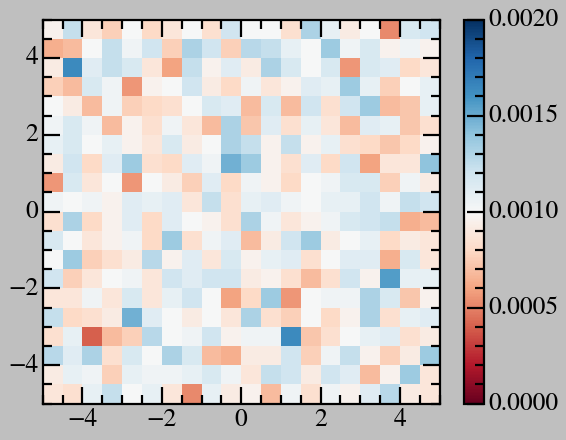

In [54]:
halo_projection = halo.HaloProjection(
    halo_file = 'uniform_ICs.hdf5',
    halo_center=np.array([5.0, 5.0, 5.0]),
)

fig, ax = plt.subplots(figsize = (8,6))
halo_projection.show_2d_projection(
    fig=fig, ax=ax, 
    box_size=10, num_bins=21,
    axis=2,
    log_scale=False,
    vmin=0, vmax=2e-3
)